<a href="https://colab.research.google.com/github/clobos/Machine_Learning/blob/main/C%C3%B3pia_de_perceptron_limiar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Perceptron de Limiar
> O perceptron de limiar é um neurônio artificial no qual a função de ativação é limiar (Figura 1). Ele é chamado separador linear, uma vez que traça um plano entre os pontos de entrada onde a saída é zero ou um (Figura 2).


---
Figura 1. Perceptron de limiar.

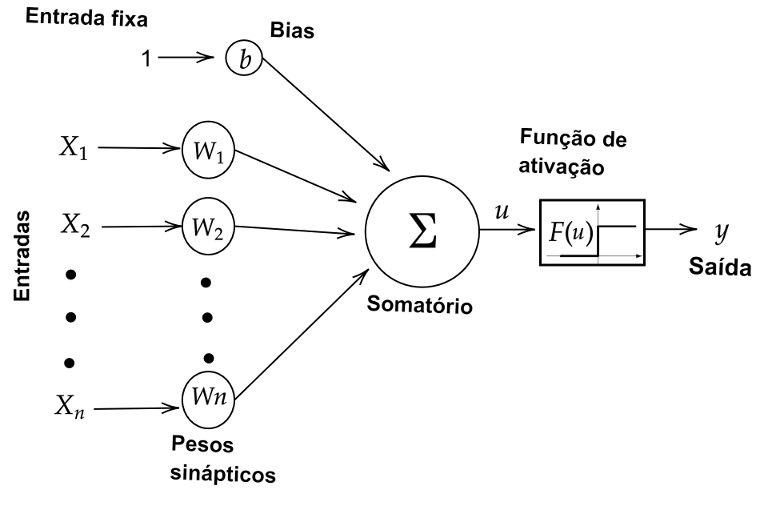

---

---
Figura 2. Funções linearmente separáveis, (a) AND e (b) OR

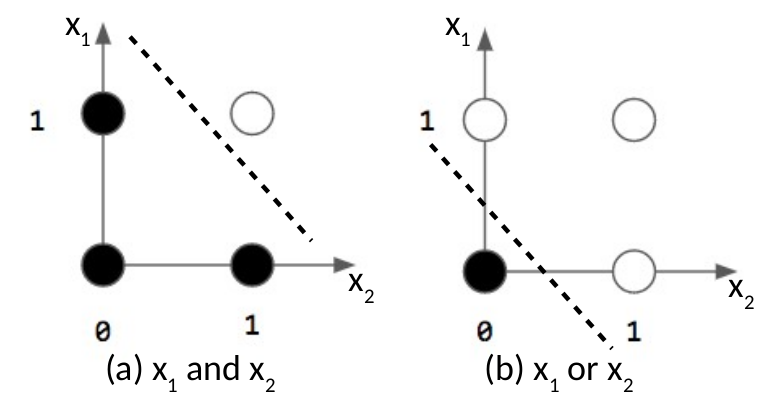

---
> Na primeira codificação, o perceptron é treinado com base em "amostras" da porta AND (conjunção). Na segunda, o treinamento usa a disjunção (OR), entretanto é exibida a linha de separação das classes após cada época de treinamento até o fim do mesmo.
* Não há dependências entre os códigos.
* Esse notebook foi criado por Alison Zille Lopes

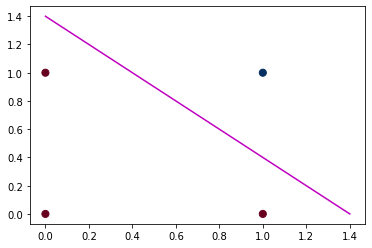

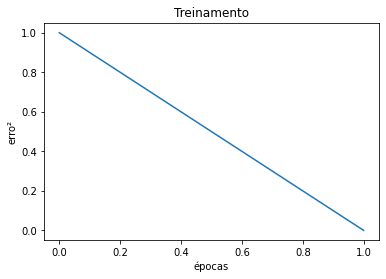

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Função que implementa um perceptron com função de ativação de limiar, onde:
# x = vetor (1 x m) de entradas
# W = vetor (1 x m+1) de pesos, incluindo o bias
def perceptron_limiar(x, W):
  X = np.concatenate(([1],x))
  u = sum(W*X)
  if u >= 0:
    return 1
  else:
    return 0


# Função para treinamento, onde:
# xin = matriz (n x m) com as amostras dos dados em linhas
# yin = vetor (n x 1) com as saídas desejadas para cada amostra de dados
# W = vetor (1 x m+1) de pesos, ou seja, [b| w], sendo b bias e w o peso das entradas
# eta = taxa de correção do peso; taxa de aprendizagem
# max_epocas = valor máximo de iterações para aprendizado
# tol = erro mínimo desejado
# erro_epoca = vetor com todos os erros quadráticos acumulados durante o aprendizado
def treina_perceptron(xin, yin, W, eta, max_epocas, tol):
  # escreva a codificação
  t = 1
  E = 1000
  erro_epoca = []
  N = yin.shape[0]
  while t < max_epocas and E>tol:
    E = 0
    for i in range(N):
      y = perceptron_limiar(xin[i, :], W)
      e = yin[i]-y
      X = np.concatenate(([1],xin[i, :]))
      W = W + eta*e*X
      E = E + e*e
    t = t+1
    erro_epoca.append(E)
  return [W, erro_epoca]

# função principal()
def principal():
  # array de entradas (4 x 2) cada linha é uma combinação possível x1 and x2
  x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
  # vetor de saída desejada (4 x 1) para x1 and x2
  y = np.array([[0], [0], [0], [1]])

  W = [0.5, 0.5, 0.5]
  eta = 1.2
  maxepocas = 50;
  tol = 0.001;

  # treinar
  [W ,erro_epoca] = treina_perceptron(x, y, W, eta, maxepocas, tol)

  # estimar saídas a partir do vetor de entradas
  ye = []
  for i in range(4):
    ye.append([perceptron_limiar(x[i, :], W)])

  plt.scatter(x[:,0], x[:,1], c = ye, s=50, cmap='RdBu')

  xc = -W[0]/W[1]
  yc = -W[0]/W[2]

  plt.plot([0,yc],[xc,0], 'm')

  plt.figure()
  plt.plot(erro_epoca)
  plt.title('Treinamento')
  plt.xlabel('épocas')
  plt.ylabel('erro²')


principal()

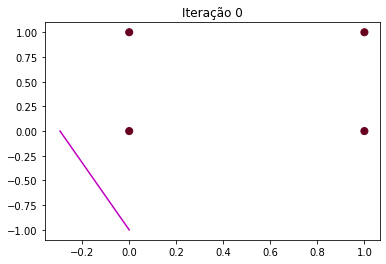

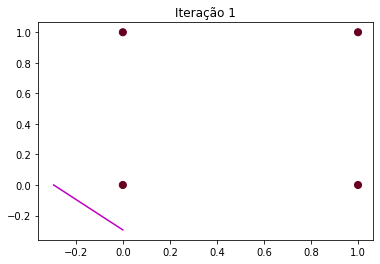

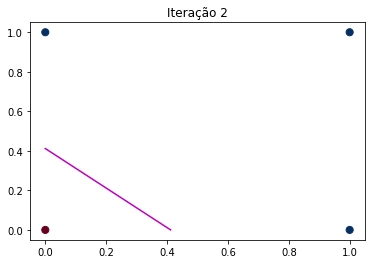

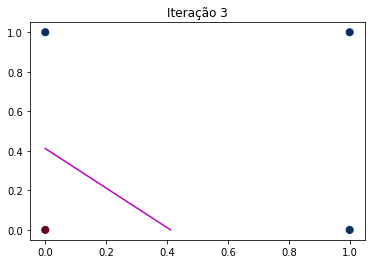

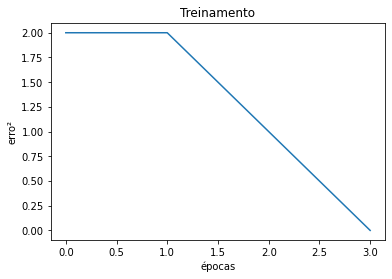

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Função que implementa um perceptron com função de ativação de limiar, onde:
# x = vetor (1 x m) de entradas
# W = vetor (1 x m+1) de pesos, ou seja, [b| w], sendo b bias e w o peso das entradas
def perceptron_limiar(x, W):
  X = np.concatenate(([1],x))
  u = sum(W*X)
  if u >= 0:
    return 1
  else:
    return 0


# Função para ajuste, onde:
# xin = matriz (n x m) com as amostras dos dados em linhas
# yin = vetor (n x 1) com as saídas desejadas para cada amostra de dados
# W = vetor (1 x m+1) de pesos, ou seja, [b| w], sendo b bias e w o peso das entradas
# eta = taxa de correção do peso
def ajusta_perceptron(xin, yin, W, eta):
  N = yin.shape[0]
  E = 0
  for i in range(N):
    y = perceptron_limiar(xin[i, :], W)
    e = yin[i]-y
    X = np.concatenate(([1],xin[i, :]))
    W = W + eta*e*X
    E = E + e*e
  return [W, E]

# função principal()
def principal():
  # array de entradas (4 x 2) cada linha é uma combinação possível x1 or x2
  x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
  # vetor de saída desejada (4 x 1) para x1 or x2
  y = np.array([[0], [1], [1], [1]])

  W = [0.5, 0.5, 0.5]
  eta = 1.2
  max_epocas = 10;
  tol = 0.001;

  # treinar
  t = 0
  E = 1000
  erro_epoca = []
  N = y.shape[0]
  while t<max_epocas and E>tol:
    [W,E] = ajusta_perceptron(x, y, W, eta)

    erro_epoca.append(E)

    # estimar saídas a partir do vetor de entradas
    ye = []
    for i in range(4):
      ye.append([perceptron_limiar(x[i, :], W)])

    plt.title(f'Iteração {t}')
    plt.scatter(x[:,0], x[:,1], c = ye, s=50, cmap='RdBu')
    xc = -W[0]/W[1]
    yc = -W[0]/W[2]
    plt.plot([0,yc],[xc,0], 'm')
    plt.show()

    time.sleep(5) # delay de 5 segundos
    t = t+1

  plt.figure()
  plt.plot(erro_epoca)
  plt.title('Treinamento')
  plt.xlabel('épocas')
  plt.ylabel('erro²')


principal()